<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Tutorial 05: Data Analysis
In the real world, data is rarely clean and ready for analysis. It often contains errors, missing values, inconsistencies, and may not be in the optimal format for modeling or visualization. Data preprocessing is a crucial step in the data science pipeline that involves cleaning, transforming, and preparing data for analysis. This tutorial covers essential data preprocessing techniques and basic statistical analysis methods using Python and popular data science libraries like Pandas, NumPy, and Scikit-learn.

## This tutorial aims to teach you how to:
*   Understand the importance of data preprocessing in the data science workflow.
*   Identify and handle incorrect data types in Pandas DataFrames.
*   Implement various strategies for dealing with missing values.
*   Format data consistently for analysis and reporting.
*   Apply different normalization/scaling techniques to numerical data.
*   Perform binning (discretization) on continuous variables.
*   Encode categorical variables using one-hot encoding.
*   Perform basic statistical analysis and interpret the results.esults.

## Exercise01: Dealing with Incorrect Data Types
This exercise provides a practical guide to handling incorrect data types in Pandas DataFrames, a crucial step in data cleaning and preparation. Using examples based on realistic data scenarios, the tutorial covers:

**The Problem**: Explains why incorrect data types (like strings stored as numbers or dates stored as strings) are problematic, preventing numerical calculations, date-based operations, and proper usage in statistical models.
**Pandas Type Conversion Methods**: Demonstrates the use of key Pandas functions for type conversion:
- `astype()`: For general type casting.
- `to_numeric()`: Specifically for converting to numeric types, with error handling.
- `to_datetime()`: For converting to datetime objects, handling various date formats.
- `pd.Categorical()`: For converting to the categorical data type, which can improve performance and memory usage.

**Error Handling**: Focuses on practical error handling techniques, especially for numeric conversions. It demonstrates how to deal with non-numeric characters (like currency symbols or commas) within numeric columns using string manipulation and how to use the `errors='coerce'` argument to convert invalid values to `NaN`.

The exercise is designed for data science students familiar with basic Pandas usage and aims to equip them with the skills to clean and prepare data for further analysis and modeling by ensuring data consistency and correctness.

In [75]:
import pandas as pd
import numpy as np

In [76]:
# Load a real-world dataset (using a slightly modified version of the Melbourne Housing dataset)
try:
    df = pd.read_csv('files/melb_data_modified.csv') # Try to use the local file
except FileNotFoundError:
    print("melb_data.csv not found locally.")

print("Original DataFrame Info:")
df.info()

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7763 non-null   object 
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-

In [77]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,...,1.0,0.0,156.0,79,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,...,2.0,0.0,134.0,150,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,...,2.0,1.0,94.0,MUICT,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,...,1.0,2.0,120.0,142,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [78]:
df['BuildingArea'].head()

0      NaN
1       79
2      150
3    MUICT
4      142
Name: BuildingArea, dtype: object

### Why Incorrect Types Are Problematic
*   Strings as numbers: Cannot perform numerical calculations, statistical analysis, or use them in most machine learning models.
*   Dates as strings: Cannot perform date-based operations (e.g., time differences, time series analysis).
*   Object as categorical: may waste memory and computing resources

### Using Pandas for Type Conversion
a) Converting 'BuildingArea' to numeric

In [79]:
print("\nBuildingArea before conversion:")
print(df['BuildingArea'].dtype)

df['BuildingArea'] = pd.to_numeric(df['BuildingArea'], errors='coerce') # if there were non-numeric values, they would become NaN
print("\nBuildingArea after conversion:")
print(df['BuildingArea'].dtype)


BuildingArea before conversion:
object

BuildingArea after conversion:
float64


In [80]:
df['BuildingArea'].head()

0      NaN
1     79.0
2    150.0
3      NaN
4    142.0
Name: BuildingArea, dtype: float64

b) Converting 'Date' to datetime

In [81]:
print("\nDate before conversion:")
print(df['Date'].dtype)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("\nDate after conversion:")
print(df['Date'].dtype)


Date before conversion:
object

Date after conversion:
datetime64[ns]


In [82]:
# Demonstrate date operations
print("\nEarliest and Latest Dates:")
print(f"Earliest Date: {df['Date'].min()}")
print(f"Latest Date: {df['Date'].max()}")


Earliest and Latest Dates:
Earliest Date: 2016-03-09 00:00:00
Latest Date: 2017-12-08 00:00:00


c) Converting 'Rooms', 'Bedroom2', 'Bathroom', 'Car' to int64 (example of float to int)

In [83]:
cols_to_convert = ['Rooms', 'Bedroom2', 'Bathroom', 'Car']
print("\nData types before conversion:")
print(df[cols_to_convert].dtypes)

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') # Int64 handles NaN better than int
print("\nData types after conversion:")
print(df[cols_to_convert].dtypes)


Data types before conversion:
Rooms         int64
Bedroom2    float64
Bathroom    float64
Car         float64
dtype: object

Data types after conversion:
Rooms       Int64
Bedroom2    Int64
Bathroom    Int64
Car         Int64
dtype: object


d) Converting 'Type', 'Method', 'Regionname' to categorical

In [84]:
cols_to_convert = ['Type', 'Method', 'Regionname']
print("\nData types before conversion:")
print(df[cols_to_convert].dtypes)

for col in cols_to_convert:
  df[col] = pd.Categorical(df[col])

print("\nData types after conversion:")
print(df[cols_to_convert].dtypes)


Data types before conversion:
Type          object
Method        object
Regionname    object
dtype: object

Data types after conversion:
Type          category
Method        category
Regionname    category
dtype: object


### Common Errors and How to Handling Them
a) Introducing non-numeric characters into a column

In [85]:
df_error = df.copy()
df_error.loc[0, 'Price'] = '$1,000,000'  # Introduce a string with currency symbols and commas
df_error['Price'] = pd.to_numeric(df_error['Price'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
print("\nPrice with currency symbols and commas handling:")
print(df_error.loc[0,'Price'])


Price with currency symbols and commas handling:
1000000


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\2124776870.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$1,000,000' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_error.loc[0, 'Price'] = '$1,000,000'  # Introduce a string with currency symbols and commas


b) Introducing an invalid date format

In [86]:
df_date_error = df.copy()
df_date_error.loc[0, 'Date'] = '2016-15-32' # Invalid date
df_date_error['Date'] = pd.to_datetime(df_date_error['Date'], errors='coerce')
print("\nDate with invalid date handling:")
print(df_date_error.loc[0,'Date'])


Date with invalid date handling:
NaT


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\3009813206.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2016-15-32' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_date_error.loc[0, 'Date'] = '2016-15-32' # Invalid date
C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\3009813206.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date_error['Date'] = pd.to_datetime(df_date_error['Date'], errors='coerce')


In [87]:
# Show the final DataFrame info
print("\nFinal DataFrame Info:")
df.info()


Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     18396 non-null  int64         
 1   Suburb         18396 non-null  object        
 2   Address        18396 non-null  object        
 3   Rooms          18396 non-null  Int64         
 4   Type           18396 non-null  category      
 5   Price          18396 non-null  int64         
 6   Method         18396 non-null  category      
 7   SellerG        18396 non-null  object        
 8   Date           6868 non-null   datetime64[ns]
 9   Distance       18395 non-null  float64       
 10  Postcode       18395 non-null  float64       
 11  Bedroom2       14927 non-null  Int64         
 12  Bathroom       14925 non-null  Int64         
 13  Car            14820 non-null  Int64         
 14  Landsize       13603 non-null  float64       
 

## Exercise 02: Handling Missing Values

This exercise provides a practical guide to handling missing values in datasets using Pandas in Python. It covers the following key aspects:

**Types of Missing Data**: Explains the different types of missing data mechanisms:
- **Missing Completely At Random (MCAR)**: Missingness is entirely random and unrelated to any other variables.
- **Missing At Random (MAR)**: Missingness is related to observed variables but not to the missing values themselves.
- **Missing Not At Random (MNAR)**: Missingness is related to the unobserved (missing) values themselves. Understanding these mechanisms is crucial for choosing appropriate handling strategies.

**Methods for Handling Missing Values**: Demonstrates several common techniques:
- **Deletion**: Covers both listwise deletion (removing entire rows with any missing values) and column deletion (removing columns with excessive missingness). Discusses the drawbacks of deletion, such as potential data loss and introduction of bias.
- **Imputation**: Explores various imputation methods:
  - Mean/median/mode imputation using fillna().
  - Forward fill (ffill()) and backward fill (bfill()) for time-series or ordered data.
  - Briefly introduces more advanced imputation techniques like KNN imputation (using KNNImputer from scikit-learn).
  
The exercise uses practical examples with a real-world dataset to illustrate each method and emphasizes the trade-offs and potential biases associated with different approaches. It aims to equip data science students with the skills to effectively address missing data and prepare datasets for robust analysis and modeling.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the Melbourne Housing dataset
try:
    df = pd.read_csv('files/melb_data.csv')
except FileNotFoundError:
    print("melb_data.csv not found locally.")

### Identifying Missing Values

In [90]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64


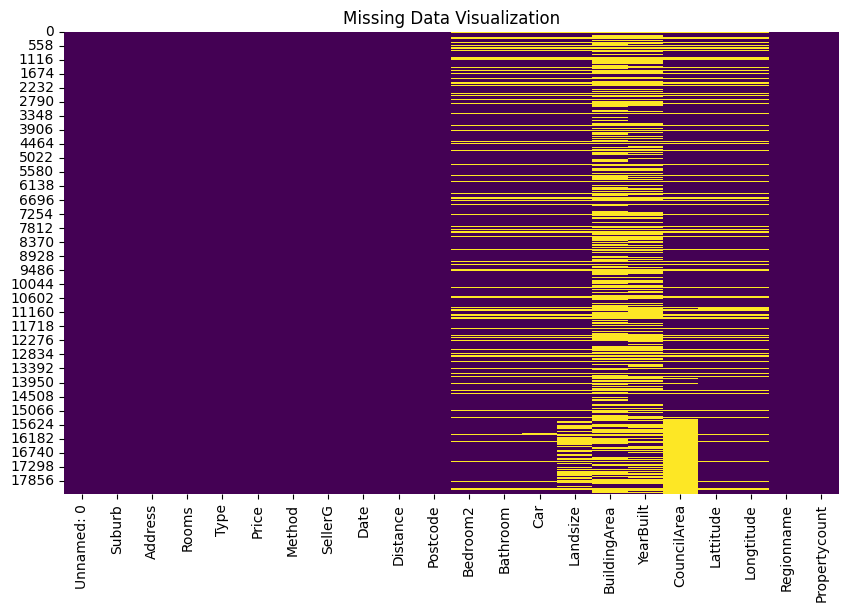

In [91]:
# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # cbar=False removes the colorbar
plt.title("Missing Data Visualization")
plt.show()

In [92]:
# Percentage of missing values
print("\nPercentage of Missing Values per Column:")
print(df.isnull().sum() / len(df) * 100)


Percentage of Missing Values per Column:
Unnamed: 0        0.000000
Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.005436
Postcode          0.005436
Bedroom2         18.857360
Bathroom         18.868232
Car              19.439008
Landsize         26.054577
BuildingArea     57.806045
YearBuilt        51.304631
CouncilArea      33.501848
Lattitude        18.112633
Longtitude       18.112633
Regionname        0.005436
Propertycount     0.005436
dtype: float64


### Types of Missing Data
*   **Missing Completely At Random (MCAR):** The probability of a value being missing is unrelated to both the observed and unobserved data. (e.g., a sensor malfunctioning randomly).
*   **Missing At Random (MAR):** The probability of a value being missing is related to the *observed* data, but not the *unobserved* data. (e.g., men are less likely to report their weight than women).
*   **Missing Not At Random (MNAR):** The probability of a value being missing is related to the *unobserved* data itself. (e.g., people with very high incomes are less likely to report their income).

In the Melbourne Housing dataset, the missing values in 'Car', 'BuildingArea', and 'YearBuilt' are likely MAR or MNAR. For example, older houses might be less likely to have data on 'BuildingArea' or 'YearBuilt'.

### Methods for Handling Missing Values
a) **Deletion**

In [93]:
# i) Listwise Deletion (dropping rows with any missing values)
df_listwise = df.dropna()
print("\nDataFrame size after Listwise Deletion:", len(df_listwise))
print("Missing Values after Listwise Deletion:")
print(df_listwise.isnull().sum())


DataFrame size after Listwise Deletion: 6196
Missing Values after Listwise Deletion:
Unnamed: 0       0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


Drawbacks of Listwise Deletion:
*   Can lead to significant data loss if many rows have missing values.
*   Can introduce bias if the missingness is not MCAR.

In [94]:
# ii) Dropping Columns with Many Missing Values
threshold = len(df) * 0.5  # Drop columns with more than 50% missing values
df_cols_dropped = df.dropna(axis=1, thresh=threshold)
print("\nDataFrame shape after dropping columns with many missing values:", df_cols_dropped.shape)
print("Missing Values after dropping columns:")
print(df_cols_dropped.isnull().sum())


DataFrame shape after dropping columns with many missing values: (18396, 20)
Missing Values after dropping columns:
Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         3469
Bathroom         3471
Car              3576
Landsize         4793
CouncilArea      6163
Lattitude        3332
Longtitude       3332
Regionname          1
Propertycount       1
dtype: int64


b) **Imputation**

In [95]:
df_imputed = df.copy() # important to work on a copy

In [96]:
# i) Mean/Median/Mode Imputation
df_imputed['Car'].fillna(df_imputed['Car'].median(), inplace=True) # median is better for skewed data
df_imputed['BuildingArea'].fillna(df_imputed['BuildingArea'].mean(), inplace=True)
df_imputed['YearBuilt'].fillna(df_imputed['YearBuilt'].mode()[0], inplace=True) # mode for categorical or skewed numerical data

print("\nMissing Values after Mean/Median/Mode Imputation:")
print(df_imputed.isnull().sum())


Missing Values after Mean/Median/Mode Imputation:
Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         3469
Bathroom         3471
Car                 0
Landsize         4793
BuildingArea        0
YearBuilt           0
CouncilArea      6163
Lattitude        3332
Longtitude       3332
Regionname          1
Propertycount       1
dtype: int64


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\2258143524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Car'].fillna(df_imputed['Car'].median(), inplace=True) # median is better for skewed data
C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\2258143524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [97]:
# ii) Forward Fill/Backward Fill
df_ffill = df.copy()
df_ffill['Car'].fillna(method='ffill', inplace=True)
print("\nMissing Values after Forward Fill:")
print(df_ffill['Car'].isnull().sum())

df_bfill = df.copy()
df_bfill['Car'].fillna(method='bfill', inplace=True)
print("\nMissing Values after Backward Fill:")
print(df_bfill['Car'].isnull().sum())


Missing Values after Forward Fill:
0

Missing Values after Backward Fill:
0


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\3142973275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ffill['Car'].fillna(method='ffill', inplace=True)
C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\3142973275.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['Car'].fillna(method='ffill', inplace=True)
C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\3142973275.py:8: FutureWarning: A value is trying to be set on a

Drawbacks of Forward/Backward Fill:
*   Not suitable for time series data with large gaps or if the order of the data isn't meaningful.
*   Can introduce bias if there are long stretches of missing values.

In [98]:
# iii) Advanced Imputation (KNN Imputation)
from sklearn.impute import KNNImputer

df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[['Car','BuildingArea','YearBuilt']] = imputer.fit_transform(df_knn[['Car','BuildingArea','YearBuilt']])
print("\nMissing Values after KNN Imputation:")
print(df_knn.isnull().sum())


Missing Values after KNN Imputation:
Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         3469
Bathroom         3471
Car                 0
Landsize         4793
BuildingArea        0
YearBuilt           0
CouncilArea      6163
Lattitude        3332
Longtitude       3332
Regionname          1
Propertycount       1
dtype: int64


`KNNImputer` is a missing value imputation technique that uses the K-Nearest Neighbors algorithm. It estimates the missing values of a data point by considering the values of its `k` nearest neighbors in the feature space. For each sample with missing values, the imputer finds the `k` nearest samples using a distance metric (typically Euclidean distance). The missing values are then imputed using the mean (for regression) or mode (for classification) of the corresponding values from the neighbors.   

In simpler terms, if a value is missing for a particular data point, `KNNImputer` looks at the `k` most similar data points (neighbors) and fills in the missing value with an average of what those neighbors have for that same feature. It's a more sophisticated approach than simple mean/median imputation because it considers the relationships between data points.

**Conclusion**: Choosing the right method depends on the nature of the missing data and the specific problem. Deletion can be simple but leads to data loss. Imputation can preserve data but can introduce bias if done incorrectly. More advanced imputation techniques exist but are computationally more expensive and may not always be necessary.

## Exercise 03: Data Formatting
This exercise focuses on essential data formatting techniques using the Pandas library in Python, applied to the Melbourne Housing dataset. It covers three key areas:

1. **Consistent Date Formats**: Demonstrates how to convert string representations of dates into Pandas datetime objects using pd.to_datetime(), handling various input formats and potential errors. It also shows how to extract date components like year, month, and day.

2. **String Manipulation for Cleaning Text Data**: Covers common text cleaning tasks such as removing extra whitespace (.strip()), converting text to lowercase (.lower()), and removing specific substrings using regular expressions (.replace() with regex=True). These techniques are applied to the "Address" and "Suburb" columns of the dataset.

3. **Renaming Columns for Clarity**: Shows how to rename columns using dictionaries for simple renaming and demonstrates more complex renaming using list comprehensions and string manipulation, allowing for programmatic and efficient renaming of multiple columns.

In [99]:
import pandas as pd
import numpy as np
import re

In [100]:
# (Re-)Load the Melbourne Housing dataset
try:
    df = pd.read_csv('files/melb_data.csv')
except FileNotFoundError:
    print("melb_data.csv not found locally.")

### Consistent Date Formats
Since the 'Date' column is already in a consistent format, we'll demonstrate how to handle different formats if they existed.

In [101]:
# Example of different date formats (for demonstration)
dates = pd.Series(['2024-01-15', '15/01/2024', 'Jan 15, 2024', '01.15.2024'])

In [102]:
# Converting to datetime, handling different formats
dates_formatted = pd.to_datetime(dates, errors='coerce', infer_datetime_format=True) # infer_datetime_format is very useful
print("Original Dates:\n", dates)
print("\nFormatted Dates:\n", dates_formatted)

Original Dates:
 0      2024-01-15
1      15/01/2024
2    Jan 15, 2024
3      01.15.2024
dtype: object

Formatted Dates:
 0   2024-01-15
1          NaT
2          NaT
3          NaT
dtype: datetime64[ns]


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\1809647900.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dates_formatted = pd.to_datetime(dates, errors='coerce', infer_datetime_format=True) # infer_datetime_format is very useful


In [103]:
# If infer_datetime_format fails or you know the exact format:
dates_formatted_explicit = pd.to_datetime(dates[1], format='%d/%m/%Y', errors='coerce') # example with explicit format
print("\nFormatted Date with explicit format:\n", dates_formatted_explicit)


Formatted Date with explicit format:
 2024-01-15 00:00:00


In [104]:
# Convert the existing 'Date' column in the main dataframe
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [105]:
# Extracting date components (useful for analysis)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print("\nDate components added to dataframe:")
print(df[['Date','Year','Month','Day']].head())


Date components added to dataframe:
        Date    Year  Month   Day
0 2016-03-12  2016.0    3.0  12.0
1 2016-04-02  2016.0    4.0   2.0
2 2017-04-03  2017.0    4.0   3.0
3 2017-04-03  2017.0    4.0   3.0
4 2016-04-06  2016.0    4.0   6.0


### String Manipulation for Cleaning Text Data

In [106]:
# Example: Cleaning the 'Address' column (demonstration of various techniques)

print("\nOriginal Address examples:")
print(df['Address'].head())


Original Address examples:
0        85 Turner St
1     25 Bloomburg St
2        5 Charles St
3    40 Federation La
4         55a Park St
Name: Address, dtype: object


In [107]:
# Removing extra whitespace
df['Address_cleaned'] = df['Address'].str.strip() # remove leading/trailing whitespace

In [108]:
# Converting to lowercase (for consistency)
df['Address_cleaned'] = df['Address_cleaned'].str.lower()

In [109]:
# Removing specific substrings (e.g., street types) using regular expressions
df['Address_cleaned'] = df['Address_cleaned'].str.replace(r'\b(st|street|rd|road|ave|avenue)\b', '', regex=True).str.strip()
print("\nCleaned Address examples:")
print(df['Address_cleaned'].head())


Cleaned Address examples:
0           85 turner
1        25 bloomburg
2           5 charles
3    40 federation la
4            55a park
Name: Address_cleaned, dtype: object


In [110]:
# Example: Cleaning the 'Suburb' column
print("\nOriginal Suburb examples:")
print(df['Suburb'].unique()[:10])

df['Suburb_cleaned'] = df['Suburb'].str.strip().str.lower()
print("\nCleaned Suburb examples:")
print(df['Suburb_cleaned'].unique()[:10])


Original Suburb examples:
['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood']

Cleaned Suburb examples:
['abbotsford' 'airport west' 'albert park' 'alphington' 'altona'
 'altona north' 'armadale' 'ascot vale' 'ashburton' 'ashwood']


### Renaming Columns for Clarity

In [111]:
# Current column names
print("\nOriginal column names:")
print(df.columns)


Original column names:
Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Year',
       'Month', 'Day', 'Address_cleaned', 'Suburb_cleaned'],
      dtype='object')


In [112]:
# Renaming columns using a dictionary
df.rename(columns={'Address_cleaned': 'Cleaned_Address', 'Suburb_cleaned': 'Cleaned_Suburb'}, inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Year',
       'Month', 'Day', 'Cleaned_Address', 'Cleaned_Suburb'],
      dtype='object')


In [113]:
# More complex renaming (using a function or list comprehension if needed)
new_cols = [col.replace('2', '_two').replace('1','') if '2' in col or '1' in col else col for col in df.columns]
df.columns = new_cols
print("\nRenamed column names:")
print(df.columns)


Renamed column names:
Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom_two', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Year',
       'Month', 'Day', 'Cleaned_Address', 'Cleaned_Suburb'],
      dtype='object')


In [114]:
# Show the DataFrame
print("\nDataFrame with formatted data:")
df.head()


DataFrame with formatted data:


,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Cleaned_Address,Cleaned_Suburb
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.0,3.0,12.0,85 turner,abbotsford
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.0,4.0,2.0,25 bloomburg,abbotsford
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.0,4.0,3.0,5 charles,abbotsford
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,...,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017.0,4.0,3.0,40 federation la,abbotsford
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,...,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016.0,4.0,6.0,55a park,abbotsford


## Exercise 04: Value Normalization/Scaling
This exercise provides a practical introduction to value normalization/scaling techniques using the Pandas and scikit-learn libraries in Python, applied to the Melbourne Housing dataset. It addresses the importance of scaling numerical features in data analysis and machine learning, particularly for algorithms sensitive to feature scales. The tutorial covers three main scaling methods:

1. **Min-Max Scaling**: Scales features to a fixed range between 0 and 1.
2. **Standardization (Z-score normalization)**: Scales features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling**: Scales features using the median and interquartile range (IQR), making it robust to outliers.

The exercise explains the underlying principles of each method, discusses when to use each technique based on the data's characteristics (especially the presence of outliers), and includes a practical example demonstrating the impact of outliers on different scaling methods. Visualizations using histograms are provided to illustrate the transformations applied to the data's distribution by each scaling technique. The tutorial is designed for undergraduate computer science students familiar with Pandas, NumPy, and basic data visualization concepts.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [116]:
# Load the Melbourne Housing dataset
try:
    df = pd.read_csv('melb_data.csv')
except FileNotFoundError:
    print("melb_data.csv not found locally.")

melb_data.csv not found locally.


In [117]:
# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
#Exclude the target variable and some other columns that are not suitable for scaling
numerical_cols.remove('Price')
numerical_cols.remove('Postcode')
numerical_cols.remove('Longtitude')
numerical_cols.remove('Lattitude')

df_numerical = df[numerical_cols].copy()

### Why Normalization is Important
*   Features on different scales can negatively impact the performance of some machine learning algorithms (e.g., distance-based algorithms like KNN, SVM, and neural networks).
*   Normalization brings features to a similar scale, preventing features with larger values from dominating the model.
*   It can also improve the convergence speed of some optimization algorithms.

### Methods for Normalization
**a) Min-Max Scaling**: Scales features to a range between 0 and 1.

In [118]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

print("\nMin-Max Scaled Data (First 5 rows):\n", df_minmax.head())
print("\nMin-Max Scaled Data describe:\n", df_minmax.describe())


Min-Max Scaled Data (First 5 rows):
    Unnamed: 0     Rooms  Distance  Bedroom_two  Bathroom  Car  Landsize  \
0    0.000000  0.090909  0.051975         0.10     0.125  0.1  0.000466   
1    0.000042  0.090909  0.051975         0.10     0.125  0.0  0.000360   
2    0.000127  0.181818  0.051975         0.15     0.250  0.0  0.000309   
3    0.000170  0.181818  0.051975         0.15     0.250  0.1  0.000217   
4    0.000212  0.272727  0.051975         0.15     0.125  0.2  0.000277   

   BuildingArea  YearBuilt  Propertycount  Year     Month  Day  
0           NaN        NaN        0.17616   0.0  0.181818  1.0  
1      0.001775   0.856448        0.17616   0.0  0.272727  0.0  
2      0.003370   0.856448        0.17616   1.0  0.272727  0.1  
3           NaN        NaN        0.17616   1.0  0.272727  0.1  
4      0.003190   0.995134        0.17616   0.0  0.272727  0.4  

Min-Max Scaled Data describe:
          Unnamed: 0         Rooms      Distance   Bedroom_two      Bathroom  \
count  183

**b) Standardization (Z-score Normalization)**: Scales features to have a mean of 0 and a standard deviation of 1.

In [119]:
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

print("\nStandardized Data (First 5 rows):\n", df_standard.head())
print("\nStandardized Data describe:\n", df_standard.describe())


Standardized Data (First 5 rows):
    Unnamed: 0     Rooms  Distance  Bedroom_two  Bathroom       Car  Landsize  \
0   -1.738952 -0.975855 -1.313053    -0.946543 -0.781230 -0.643927 -0.089315   
1   -1.738805 -0.975855 -1.313053    -0.946543 -0.781230 -1.690080 -0.100852   
2   -1.738511  0.067795 -1.313053     0.090147  0.669542 -1.690080 -0.106370   
3   -1.738364  0.067795 -1.313053     0.090147  0.669542 -0.643927 -0.116402   
4   -1.738217  1.111445 -1.313053     0.090147 -0.781230  0.402225 -0.109881   

   BuildingArea  YearBuilt  Propertycount      Year     Month       Day  
0           NaN        NaN      -0.779578 -1.087699 -1.080337  1.543885  
1     -0.139111  -1.780002      -0.779578 -1.087699 -0.786683 -2.111578  
2     -0.002350  -1.780002      -0.779578  0.919372 -0.786683 -1.746032  
3           NaN        NaN      -0.779578  0.919372 -0.786683 -1.746032  
4     -0.017760   1.300147      -0.779578 -1.087699 -0.786683 -0.649393  

Standardized Data describe:
          

**c) Robust Scaling**: Scales features using the median and interquartile range (IQR), making it less sensitive to outliers.

In [120]:
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

print("\nRobust Scaled Data (First 5 rows):\n", df_robust.head())
print("\nRobust Scaled Data describe:\n", df_robust.describe())


Robust Scaled Data (First 5 rows):
    Unnamed: 0  Rooms  Distance  Bedroom_two  Bathroom  Car  Landsize  \
0   -1.001865   -1.0 -1.028571         -1.0       0.0 -1.0 -0.501581   
1   -1.001780   -1.0 -1.028571         -1.0       0.0 -2.0 -0.598525   
2   -1.001611    0.0 -1.028571          0.0       1.0 -2.0 -0.644889   
3   -1.001526    0.0 -1.028571          0.0       1.0 -1.0 -0.729189   
4   -1.001441    1.0 -1.028571          0.0       0.0  0.0 -0.674394   

   BuildingArea  YearBuilt  Propertycount  Year     Month       Day  
0           NaN        NaN      -0.422064  -1.0 -0.571429  1.333333  
1     -0.580247      -1.40      -0.422064  -1.0 -0.428571 -2.000000  
2      0.296296      -1.40      -0.422064   0.0 -0.428571 -1.666667  
3           NaN        NaN      -0.422064   0.0 -0.428571 -1.666667  
4      0.197531       0.88      -0.422064  -1.0 -0.428571 -0.666667  

Robust Scaled Data describe:
          Unnamed: 0         Rooms      Distance   Bedroom_two      Bathroom  \


### When to Use Which Method
*   **Min-Max Scaling:**
     *   Useful when you need values in a specific range (e.g., 0-1).
     *   Sensitive to outliers. If your data has outliers, it may compress most of your data into a very narrow range.
     *   Good for algorithms that rely on distances or require features to be in a specific range (e.g., neural networks, image processing).
       

*   **Standardization (Z-score Normalization):**
     *   Useful when the data has a Gaussian distribution or when outliers are not a major concern.
     *   Less sensitive to outliers than Min-Max scaling.
     *   Good for algorithms that assume data is normally distributed (e.g., linear regression, logistic regression).


*   **Robust Scaling:**
     *   Useful when the data contains many outliers.
     *   Less sensitive to outliers than both Min-Max scaling and Standardization.
     *   Good for situations where outliers are present and you want to minimize their influence on the scaling.

In [121]:
# Example demonstrating the effect of outliers
data = {'values':[1,2,3,4,5,6,7,8,9,10,100]}
df_outliers = pd.DataFrame(data)

In [122]:
scaler = MinMaxScaler()
df_minmax_outliers = pd.DataFrame(scaler.fit_transform(df_outliers), columns=df_outliers.columns, index=df_outliers.index)

scaler = StandardScaler()
df_standard_outliers = pd.DataFrame(scaler.fit_transform(df_outliers), columns=df_outliers.columns, index=df_outliers.index)

scaler = RobustScaler()
df_robust_outliers = pd.DataFrame(scaler.fit_transform(df_outliers), columns=df_outliers.columns, index=df_outliers.index)

In [123]:
print("\nExample demonstrating the effect of outliers")
print("Original data:\n",df_outliers)
print("MinMax scaled data:\n",df_minmax_outliers)
print("Standard scaled data:\n",df_standard_outliers)
print("Robust scaled data:\n",df_robust_outliers)


Example demonstrating the effect of outliers
Original data:
     values
0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10     100
MinMax scaled data:
       values
0   0.000000
1   0.010101
2   0.020202
3   0.030303
4   0.040404
5   0.050505
6   0.060606
7   0.070707
8   0.080808
9   0.090909
10  1.000000
Standard scaled data:
       values
0  -0.479441
1  -0.442817
2  -0.406193
3  -0.369569
4  -0.332945
5  -0.296321
6  -0.259697
7  -0.223073
8  -0.186449
9  -0.149825
10  3.146331
Robust scaled data:
     values
0     -1.0
1     -0.8
2     -0.6
3     -0.4
4     -0.2
5      0.0
6      0.2
7      0.4
8      0.6
9      0.8
10    18.8


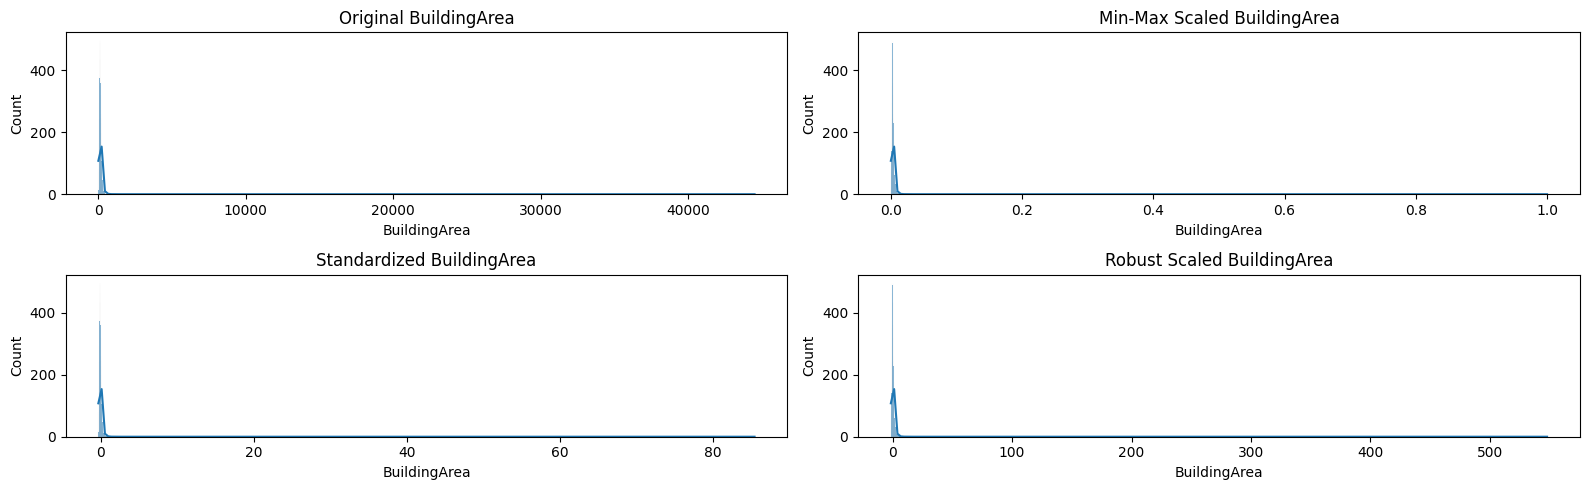

In [124]:
# Visualizing the effects of scaling
fig, axes = plt.subplots(2, 2, figsize=(16, 5))

sns.histplot(df_numerical['BuildingArea'], ax=axes[0][0], kde=True)
axes[0][0].set_title('Original BuildingArea')

sns.histplot(df_minmax['BuildingArea'], ax=axes[0][1], kde=True)
axes[0][1].set_title('Min-Max Scaled BuildingArea')

sns.histplot(df_standard['BuildingArea'], ax=axes[1][0], kde=True)
axes[1][0].set_title('Standardized BuildingArea')

sns.histplot(df_robust['BuildingArea'], ax=axes[1][1], kde=True)
axes[1][1].set_title('Robust Scaled BuildingArea')

plt.tight_layout()
plt.show()

## Exercise 05: Binning (Discretization)
This exercise introduces the concept of binning (or discretization), a data transformation technique used to convert continuous numerical variables into discrete categorical variables (bins or intervals). Using the Melbourne Housing dataset, the tutorial explains the benefits of binning, such as simplifying complex data, handling outliers, and potentially improving model performance. It demonstrates two common binning methods using Pandas: equal-width binning (`pd.cut()`) and equal-frequency binning (quantiles using `pd.qcut()`). The tutorial also provides guidance on choosing the appropriate binning method based on the data's distribution and the goals of the analysis, including an example with skewed data. Visualizations are used to illustrate the effects of binning on data distributions.

Binning, also known as discretization, is a valuable data preprocessing technique with several important applications in data analysis and machine learning. By grouping continuous numerical data into discrete intervals, binning can:

- **Simplify complex data**: Making it easier to identify patterns and trends.
- **Handle outliers**: Reducing the influence of extreme values on analysis and models.
- **Create categorical features**: Enabling the use of algorithms that perform better with discrete inputs.

This tutorial covered two primary binning methods:
- **Equal-width binning**: Divides the data range into equal-sized intervals, suitable for uniformly distributed data or when specific ranges are needed.
- **Equal-frequency binning (quantiles)**: Creates bins with approximately the same number of data points, useful for skewed data or creating balanced groups.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# Re-Load the Melbourne Housing dataset
try:
    df = pd.read_csv('files/melb_data.csv')
except FileNotFoundError:
    print("melb_data.csv not found locally.")

### Why Binning is Useful
*   **Simplifying Complex Data:** Binning can simplify complex numerical data by grouping similar values into bins. This can make it easier to visualize patterns and trends.
*   **Handling Outliers:** Binning can reduce the impact of outliers by placing extreme values into the same bin as other high or low values.
*   **Improving Model Performance:** Some machine learning models (e.g., decision trees, naive Bayes) can perform better with discrete input features.
*   **Creating Categorical Features:** Binning transforms numerical features into categorical ones, which can be useful for certain types of analysis or modeling.

### Methods for Binning
**a) Equal-Width Binning (Using pd.cut())**: Divides the range of the variable into equal-width intervals.

In [127]:
# Example: Binning 'BuildingArea' into 5 equal-width bins
print("\nBuilding Area describe before binning:")
print(df['BuildingArea'].describe())

df['BuildingArea_EqualWidth'] = pd.cut(df['BuildingArea'], bins=5, labels=False, include_lowest=True, duplicates='drop') # labels=False returns bin indices
print("\nValue counts for Equal-Width Bins:")
print(df['BuildingArea_EqualWidth'].value_counts().sort_index())


Building Area describe before binning:
count     7762.000000
mean       151.220219
std        519.188596
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

Value counts for Equal-Width Bins:
BuildingArea_EqualWidth
0.0    7761
4.0       1
Name: count, dtype: int64


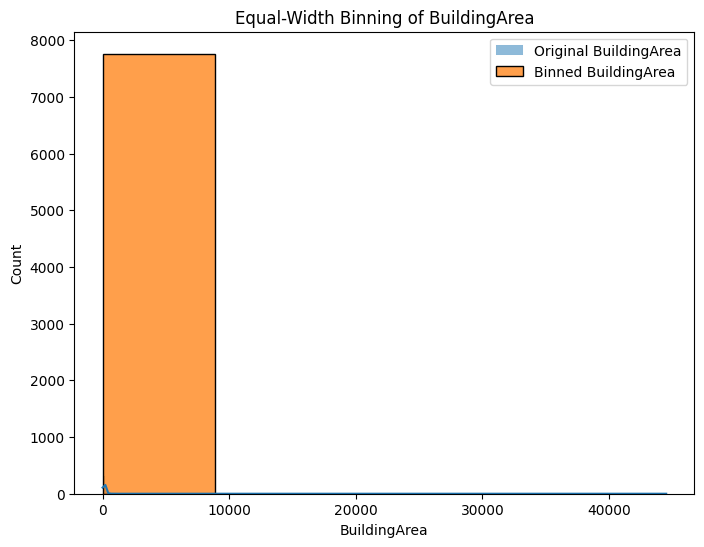

In [128]:
# Visualizing the binned data
plt.figure(figsize=(8, 6))
sns.histplot(df['BuildingArea'], kde=True, label='Original BuildingArea')
sns.histplot(df['BuildingArea'], bins=5, label='Binned BuildingArea')
plt.title('Equal-Width Binning of BuildingArea')
plt.legend()
plt.show()

**Question**: Do you think the Equal-Width Binning method is suitable for the 'BuildingArea' column?

**b) Equal-Frequency Binning (Quantiles) (Using pd.qcut())**: Divides the range of the variable into intervals containing approximately the same number of data points.

In [129]:
# Example: Binning 'Price' into quartiles (4 equal-frequency bins)
print("\nPrice describe before binning:")
print(df['Price'].describe())


Price describe before binning:
count    1.839600e+04
mean     1.056697e+06
std      6.419217e+05
min      8.500000e+04
25%      6.330000e+05
50%      8.800000e+05
75%      1.302000e+06
max      9.000000e+06
Name: Price, dtype: float64


In [130]:
df['Price_Quantiles'] = pd.qcut(df['Price'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
print("\nValue counts for Quantile Bins:")
print(df['Price_Quantiles'].value_counts().sort_index())


Value counts for Quantile Bins:
Price_Quantiles
Q1    4601
Q2    4602
Q3    4596
Q4    4597
Name: count, dtype: int64


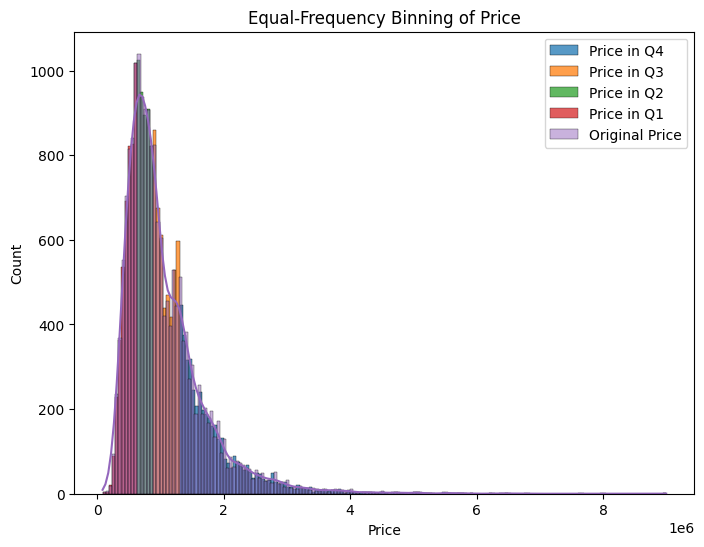

In [131]:
# Visualizing the binned data
plt.figure(figsize=(8, 6))
for i in df['Price_Quantiles'].unique():
    sns.histplot(df[df['Price_Quantiles'] == i]['Price'], binwidth = 50000, label=f'Price in {i}')
plt.title('Equal-Frequency Binning of Price')
sns.histplot(df['Price'], binwidth = 50000, kde=True, label='Original Price')
plt.legend()
plt.show()

In [132]:
# Example: Binning 'Distance' into 10 equal-frequency bins
print("\nDistance describe before binning:")
print(df['Distance'].describe())


Distance describe before binning:
count    18395.000000
mean        10.389986
std          6.009050
min          0.000000
25%          6.300000
50%          9.700000
75%         13.300000
max         48.100000
Name: Distance, dtype: float64


In [133]:
df['Distance_Quantiles'] = pd.qcut(df['Distance'], q=10, labels=False, duplicates='drop')
print("\nValue counts for Distance Quantile Bins:")
print(df['Distance_Quantiles'].value_counts().sort_index())


Value counts for Distance Quantile Bins:
Distance_Quantiles
0.0    1982
1.0    1775
2.0    1872
3.0    1968
4.0    1706
5.0    2365
6.0    1345
7.0    2054
8.0    1514
9.0    1814
Name: count, dtype: int64


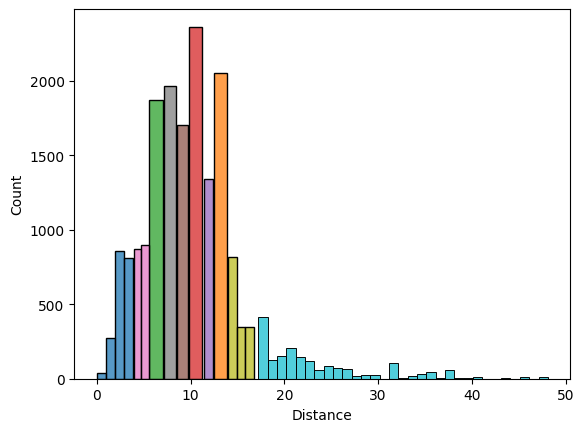

In [134]:
#Quick visualization of the binned distances
for i in df['Distance_Quantiles'].unique():
    sns.histplot(df[df['Distance_Quantiles'] == i]['Distance'],binwidth=1, label=f'Distance in {i}')

### Choosing Between Equal-Width and Equal-Frequency Binning
*   **Equal-Width:** Use when you want to divide the data into intervals of equal size, regardless of the distribution of the data. Suitable for uniformly distributed data or when you need to define specific ranges.
*   **Equal-Frequency:** Use when you want each bin to contain approximately the same number of data points. Useful for skewed data or when you want to create balanced groups.

In [135]:
# Example of skewed data
data = {'values':[1,2,3,4,5,6,7,8,9,10,100]}
df_skewed = pd.DataFrame(data)

df_skewed['EqualWidth'] = pd.cut(df_skewed['values'], bins=5, labels=False, include_lowest=True)
df_skewed['EqualFrequency'] = pd.qcut(df_skewed['values'], q=5, labels=False, duplicates='drop')

print("\nExample of skewed data")
display(df_skewed)
print("\nValue counts for Equal-Width Bins on skewed data:")
print(df_skewed['EqualWidth'].value_counts().sort_index())
print("\nValue counts for Equal-Frequency Bins on skewed data:")
print(df_skewed['EqualFrequency'].value_counts().sort_index())


Example of skewed data


,values,EqualWidth,EqualFrequency
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,1
4,5,0,1
5,6,0,2
6,7,0,2
7,8,0,3
8,9,0,3
9,10,0,4



Value counts for Equal-Width Bins on skewed data:
EqualWidth
0    10
4     1
Name: count, dtype: int64

Value counts for Equal-Frequency Bins on skewed data:
EqualFrequency
0    3
1    2
2    2
3    2
4    2
Name: count, dtype: int64


**Conclusion**: The choice between these methods depends on the characteristics of the data and the specific goals of the analysis. For example, equal-frequency binning is often preferred for skewed data to ensure that each bin has a reasonable number of observations.

While binning offers several advantages, it's important to be aware of potential drawbacks. Binning can lead to some loss of information, as the precise values within each bin are no longer distinguished. The choice of the number of bins can also impact the results, requiring some experimentation and domain knowledge.

## Exercise 06: Dealing with Categorical Variables
Many machine learning algorithms require numerical input. Categorical variables, which represent qualities or characteristics (e.g., colors, types, categories), need to be converted into numerical representations before they can be used in these algorithms. This process is called encoding. This exercise focuses on one-hot encoding, a common and effective method for handling categorical variables, and briefly mentions other encoding techniques.

### Why Categorical Variables Need Encoding
*   Most machine learning algorithms operate on numerical data.
*   Categorical variables represent distinct categories and do not have a natural numerical ordering or magnitude.
*   Using categorical variables directly can lead to incorrect interpretations by the algorithms.

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [137]:
# Re-load the Melbourne Housing dataset
try:
    df = pd.read_csv('files/melb_data.csv')
except FileNotFoundError:
    print("melb_data.csv not found locally.")

### One-Hot Encoding
This method creates new binary columns for each unique category in the original variable. If a data point belongs to a specific category, the corresponding binary column will have a value of 1, and all other binary columns will have a value of 0.

**a) Using pd.get_dummies()** (Simpler for basic one-hot encoding)

In [138]:
print("\nOriginal 'Type' column values:")
print(df['Type'].value_counts())


Original 'Type' column values:
Type
h    12095
u     4296
t     2005
Name: count, dtype: int64


In [139]:
df_encoded = pd.get_dummies(df, columns=['Type'], prefix='Type') # prefix makes the name more clear
print("\nDataFrame after one-hot encoding 'Type' using get_dummies():")
print(df_encoded[['Type_h','Type_u','Type_t']].head())


DataFrame after one-hot encoding 'Type' using get_dummies():
   Type_h  Type_u  Type_t
0    True   False   False
1    True   False   False
2    True   False   False
3    True   False   False
4    True   False   False


**b) Using OneHotEncoder from sklearn.preprocessing** (More flexible, handles unseen categories)

In [140]:
# Select the categorical columns to encode
categorical_cols = ['Method', 'Regionname', 'CouncilArea']
df_categorical = df[categorical_cols].copy()

# Create the OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # handle_unknown deals with unseen values in test data

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(df_categorical)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=df_categorical.index)

print("\nDataFrame after one-hot encoding using OneHotEncoder:")
display(encoded_df.head())


DataFrame after one-hot encoding using OneHotEncoder:


,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,...,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [141]:
# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
print("\nFinal DataFrame after one-hot encoding:")
display(df_encoded.head())
print(df_encoded.info())


Final DataFrame after one-hot encoding:


,Unnamed: 0,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,...,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_nan
0,1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,Biggin,4/03/2017,2.5,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,Nelson,4/06/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             18396 non-null  int64  
 1   Suburb                                 18396 non-null  object 
 2   Address                                18396 non-null  object 
 3   Rooms                                  18396 non-null  int64  
 4   Type                                   18396 non-null  object 
 5   Price                                  18396 non-null  float64
 6   SellerG                                18396 non-null  object 
 7   Date                                   18396 non-null  object 
 8   Distance                               18395 non-null  float64
 9   Postcode                               18395 non-null  float64
 10  Bedroom2                               14927 non-null  float64
 11  Ba

### Other Encoding Methods (Advanced)

*   **Label Encoding:** Assigns a unique integer to each category. Suitable for ordinal categorical variables (where there is a meaningful order). Can introduce unintended ordinal relationships if applied to nominal variables.
*   **Ordinal Encoding:** Similar to label encoding but explicitly specifies the order of the categories.
*   **Target Encoding:** Replaces each category with the mean of the target variable for that category. Can lead to overfitting if not used carefully.

In [142]:
# Example of Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Regionname_encoded'] = le.fit_transform(df['Regionname'])
print("\nExample of Label Encoding:")
print(df[['Regionname','Regionname_encoded']].head())


Example of Label Encoding:
              Regionname  Regionname_encoded
0  Northern Metropolitan                   2
1  Northern Metropolitan                   2
2  Northern Metropolitan                   2
3  Northern Metropolitan                   2
4  Northern Metropolitan                   2


**Conclusion**: One-hot encoding is a powerful technique for converting categorical variables into a numerical format suitable for many machine learning algorithms. While other encoding methods exist, one-hot encoding is often preferred for nominal categorical variables as it avoids introducing unintended ordinal relationships. The choice of encoding technique depends on the nature of the categorical variable and the specific requirements of the chosen machine learning model.

## Exercise 06: Data Processing Steps - Putting what we learned into an analysis pipeline
Data preprocessing is a vital step in any data science project. Real-world data is often messy, containing errors, missing values, and inconsistencies. "Garbage in, garbage out" perfectly describes the importance of this step. Without proper preprocessing, even the most sophisticated models will produce unreliable results. "Tidy data" is a standard format where each variable is a column, each observation is a row, and each type of observational unit is a table. This structure makes data manipulation and analysis much more straightforward. This tutorial covers several key preprocessing techniques: dealing with incorrect data types, handling missing values, data formatting, value normalization/scaling, binning, and handling categorical variables.

In [143]:
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer

In [144]:
# Load the Video Game Sales dataset
try:
    df = pd.read_csv('files/vgsales_modified.csv')
except FileNotFoundError:
    print("vgsales.csv not found locally.")

### Step 01: Dealing with Incorrect Data Types

In [145]:
print("\nInitial Data Types:")
print(df.dtypes)


Initial Data Types:
Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [146]:
# a) Converting 'Year' to numeric (handling non-numeric values)
print("\nValue counts for Year before conversion:")
print(df['Year'].value_counts(dropna=False))


Value counts for Year before conversion:
Year
2009       1431
2008       1428
2010       1259
2007       1202
2011       1139
2006       1008
2005        941
2002        829
2003        775
2004        763
2012        657
2015        614
2014        582
2013        546
2001        482
1998        379
2000        349
2016        344
1999        338
1997        289
1996        263
NaN         261
1995        219
1994        121
1993         60
1981         46
1992         43
1991         41
1982         36
1986         21
1989         17
1983         17
1990         16
1987         16
1988         15
1984         14
1985         14
1980          9
Null          5
Empty         3
2017          3
No Data       2
2020          1
Name: count, dtype: int64


In [147]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # convert to numeric and put NaNs for non-numeric values
print("\nValue counts for Year after conversion:")
print(df['Year'].value_counts(dropna=False))


Value counts for Year after conversion:
Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
NaN        271
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [148]:
# b) Converting 'Rank' to integer
df['Rank'] = df['Rank'].astype('Int64')

In [149]:
# c) Convert 'Genre', 'Platform', 'Publisher' to Categorical
cols_to_convert = ['Genre', 'Platform', 'Publisher']
for col in cols_to_convert:
    df[col] = pd.Categorical(df[col])

In [150]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Rank               Int64
Name              object
Platform        category
Year             float64
Genre           category
Publisher       category
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object


### Step 02: Handling Missing Values

In [151]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        57
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [152]:
# We will drop rows where 'Year' is NaN as it is important for analysis
df.dropna(subset=['Year'], inplace=True)

In [153]:
# For 'Publisher' where there are many missing values, we will fill it with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)

C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\2864538801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


In [154]:
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


### Step 03: Data Formatting

In [155]:
# a) Renaming columns for better readability
df.rename(columns={'NA_Sales': 'North_America_Sales', 'EU_Sales': 'Europe_Sales', 'JP_Sales': 'Japan_Sales', 'Other_Sales': 'Other_Regions_Sales'}, inplace=True)

In [156]:
# b) Create Total Sales column
df['Total_Sales'] = df['North_America_Sales'] + df['Europe_Sales'] + df['Japan_Sales'] + df['Other_Regions_Sales']

### Step 04: Value Normalization/Scaling

In [157]:
numerical_cols = ['Rank', 'Year', 'North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Other_Regions_Sales', 'Total_Sales']
df_numerical = df[numerical_cols].copy()

In [158]:
# a) Standardizing the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

### Step 05: Binning (Discretization)

In [159]:
# Binning Total Sales
df['Total_Sales_Binned'] = pd.qcut(df['Total_Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [160]:
print(df['Total_Sales_Binned'].value_counts().sort_index())

Total_Sales_Binned
Low          4099
Medium       4129
High         4053
Very High    4046
Name: count, dtype: int64


### Step 06: Dealing with Categorical Variables (already converted in step 2)

In [161]:
# One-hot encode 'Genre'
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Rank                 16327 non-null  Int64   
 1   Name                 16327 non-null  object  
 2   Platform             16327 non-null  category
 3   Year                 16327 non-null  float64 
 4   Publisher            16327 non-null  category
 5   North_America_Sales  16327 non-null  float64 
 6   Europe_Sales         16327 non-null  float64 
 7   Japan_Sales          16327 non-null  float64 
 8   Other_Regions_Sales  16327 non-null  float64 
 9   Global_Sales         16327 non-null  float64 
 10  Total_Sales          16327 non-null  float64 
 11  Total_Sales_Binned   16327 non-null  category
 12  Genre_Action         16327 non-null  bool    
 13  Genre_Adventure      16327 non-null  bool    
 14  Genre_Fighting       16327 non-null  bool    
 15  Genre_Misc           163

### Step 07: Statistical Analysis

In [163]:
# a) Descriptive statistics
print("\nDescriptive statistics of Total Sales:")
print(df['Total_Sales'].describe())


Descriptive statistics of Total Sales:
count    16327.000000
mean         0.539956
std          1.565848
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Total_Sales, dtype: float64


In [164]:
df['Total_Sales']

0        82.74
1        40.24
2        35.83
3        33.00
4        31.38
         ...  
16593     0.01
16594     0.01
16595     0.00
16596     0.01
16597     0.01
Name: Total_Sales, Length: 16327, dtype: float64

In [165]:
# b) Sales by Genre
sales_cols = ['North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Other_Regions_Sales', 'Total_Sales']
sales_by_genre = df.groupby('Platform')[sales_cols].sum().sort_values(by='Total_Sales', ascending=False)
print("\nSales by Platform:")
display(sales_by_genre)


Sales by Platform:


C:\Users\gifly\AppData\Local\Temp\ipykernel_6012\1661967655.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_genre = df.groupby('Platform')[sales_cols].sum().sort_values(by='Total_Sales', ascending=False)


,North_America_Sales,Europe_Sales,Japan_Sales,Other_Regions_Sales,Total_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56
X360,594.33,278.01,12.30,84.67,969.31
PS3,388.90,340.47,79.21,140.81,949.39
Wii,497.37,264.35,68.28,79.20,909.20
DS,388.56,194.07,175.02,60.29,817.94
PS,334.71,212.38,139.78,40.69,727.56
GBA,184.12,74.59,46.56,7.61,312.88
PSP,107.09,67.16,75.89,41.52,291.66
PS4,96.80,123.70,14.30,43.36,278.16


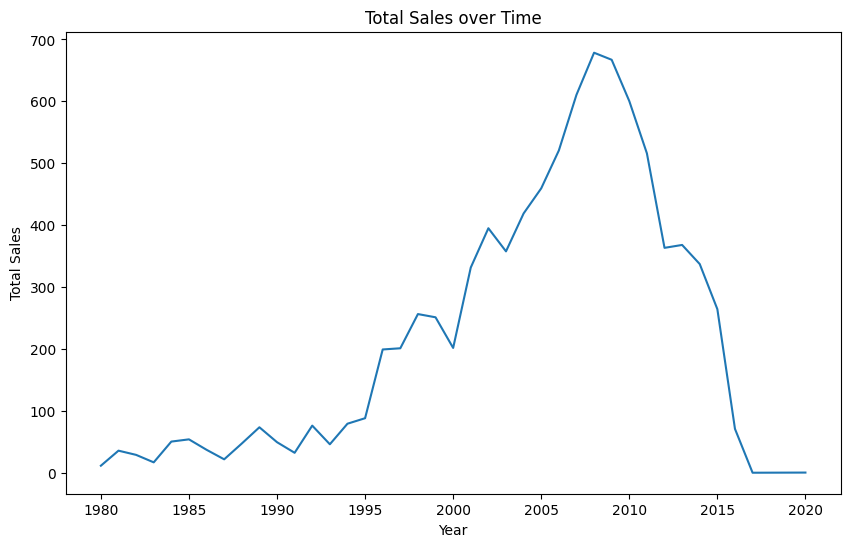

In [166]:
# c) Sales over time
sales_over_time = df.groupby('Year')['Total_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line')
plt.title('Total Sales over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

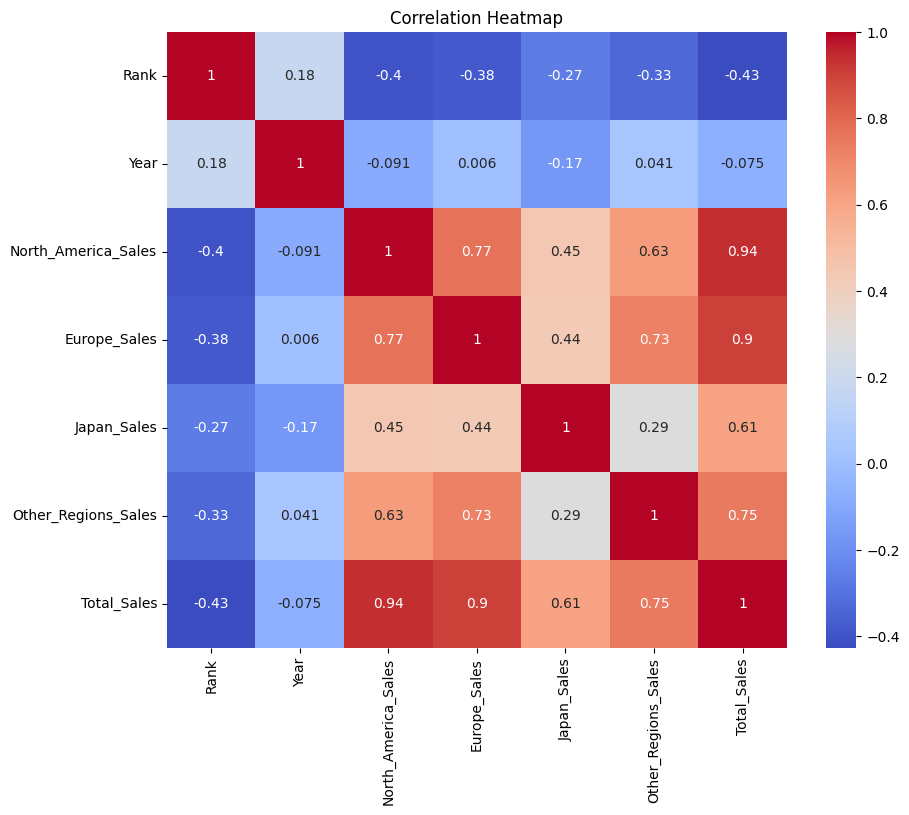

In [167]:
# d) Correlation
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

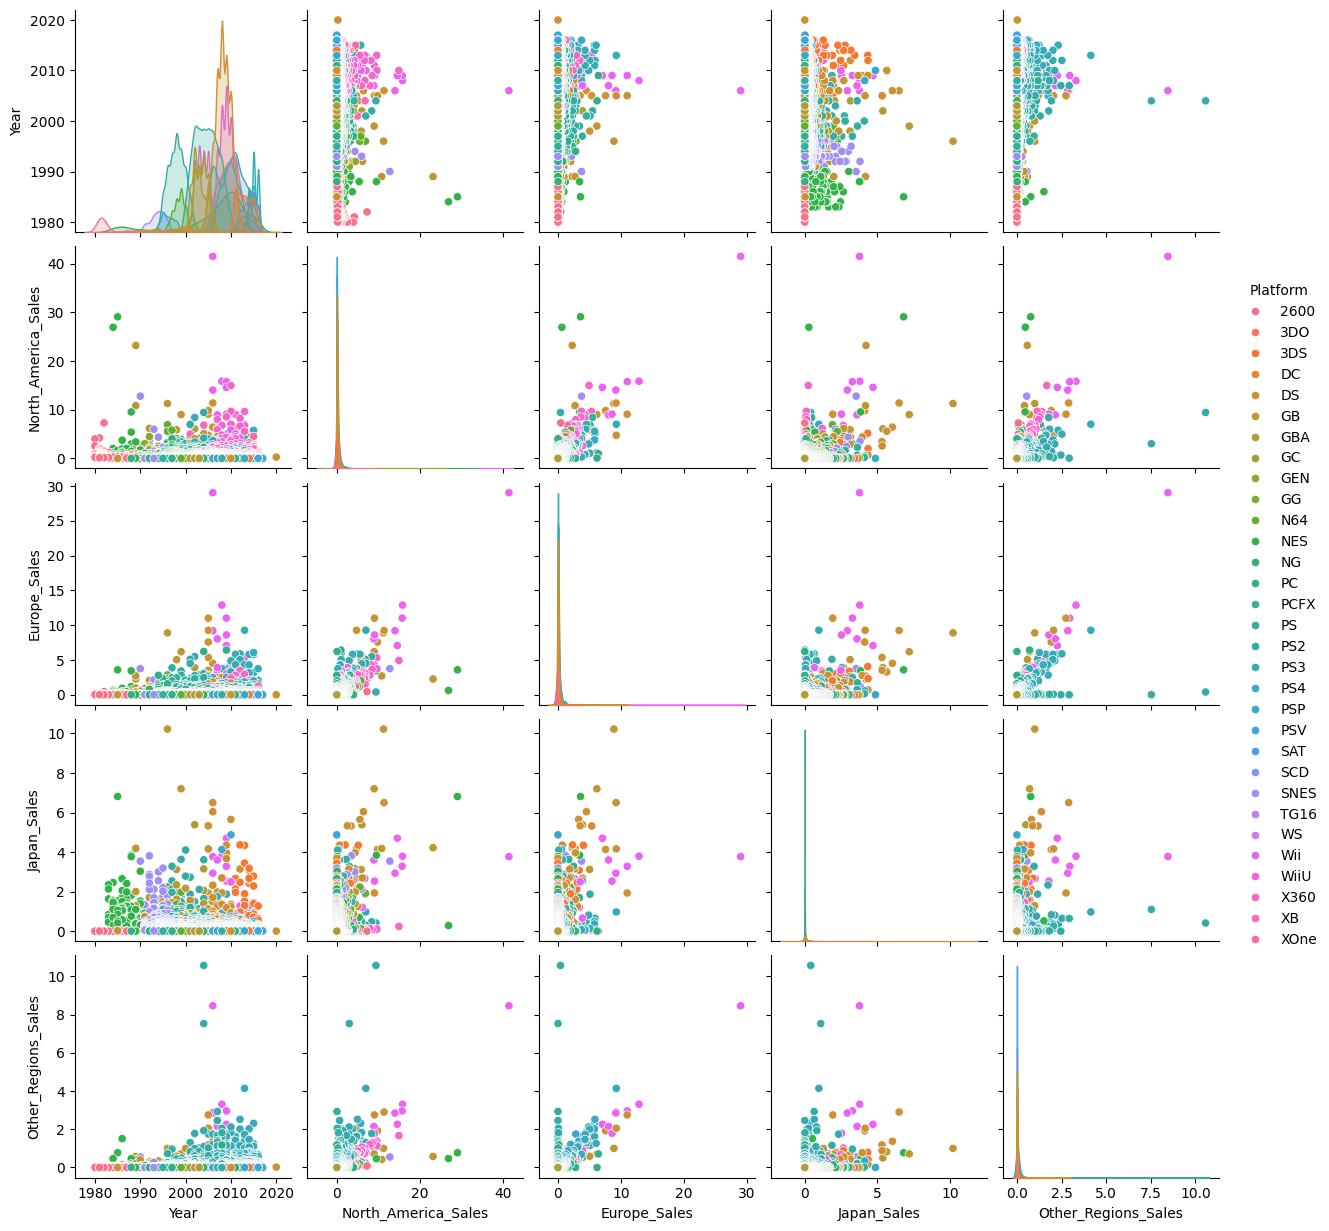

In [168]:
#Pair Plots
sns.pairplot(df[['Platform', 'Year', 'North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Other_Regions_Sales']], hue = 'Platform')

In [169]:
# e) Hypothesis testing (comparing sales in NA and EU)
na_sales = df['North_America_Sales']
eu_sales = df['Europe_Sales']

t_statistic, p_value = stats.ttest_ind(na_sales, eu_sales, nan_policy='omit')

print("\nT-test comparing North America and Europe sales:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in sales between North America and Europe.")
else:
    print("There is no statistically significant difference in sales between North America and Europe.")


T-test comparing North America and Europe sales:
T-statistic: 15.584121819418778
P-value: 1.468329590009916e-54
There is a statistically significant difference in sales between North America and Europe.


In [170]:
# Display the final DataFrame (first 5 rows)
print("\nFirst 5 rows of the processed DataFrame:")
print(df.head())


First 5 rows of the processed DataFrame:
   Rank                      Name Platform    Year Publisher  \
0     1                Wii Sports      Wii  2006.0  Nintendo   
1     2         Super Mario Bros.      NES  1985.0  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Nintendo   

   North_America_Sales  Europe_Sales  Japan_Sales  Other_Regions_Sales  \
0                41.49         29.02         3.77                 8.46   
1                29.08          3.58         6.81                 0.77   
2                15.85         12.88         3.79                 3.31   
3                15.75         11.01         3.28                 2.96   
4                11.27          8.89        10.22                 1.00   

   Global_Sales  ...  Genre_Fighting Genre_Misc  Genre_Platform  Genre_Puzzle  \
0         82.74  ...           False      False

<p style="text-align:center;">That's it! Congratulations! <br> 
    Let's now work on your lab assigment.</p>